In [350]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

In [351]:
# Read the datasets
true_df=pd.read_csv('True.csv')
fake_df=pd.read_csv('Fake.csv')

In [352]:
# Check the datasets
true_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [353]:
true_df.subject.value_counts()

subject
politicsNews    11272
worldnews       10145
Name: count, dtype: int64

In [354]:
fake_df.head()


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [355]:
fake_df.subject.value_counts()

subject
News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: count, dtype: int64

In [356]:
# Classify the news into two categories 0 for true, 1 for fake
true_df['class']=0
fake_df['class']=1

In [357]:
# Merge the two dataframes
df=pd.concat([true_df,fake_df]).reset_index(drop=True)
df.head()

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


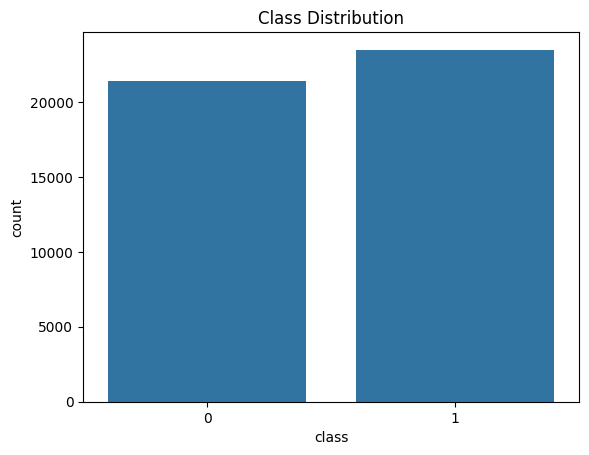

In [358]:
# Create a countplot to see the class distribution
sns.countplot(data=df,x='class')
plt.title('Class Distribution')
plt.show()

DATA CLEANING

In [359]:
def clean_text(text):
    # Remove URLS
    text=re.sub(r'http\S+|www\S+|https\S+','',text, flags=re.MULTILINE)
    # Remove HTML tags
    text=re.sub(r'<.*?>','',text)
    # Remove non-alphabetic characters
    text=re.sub(r'[^a-zA-Z]',' ',text)
    #Convert the whole text to lowercase
    text=text.lower()
    # Remove extra blank spaces
    text=re.sub(r'\s+',' ',text).strip()
    return text

# Apply the cleaning text function to the dataframe
df['text']=df['text'].apply(clean_text)

In [360]:
# Only keep necessary columns
df=df[['text','class']]

In [361]:
# Check if there is any missing data
df.isna().sum()

text     0
class    0
dtype: int64

In [362]:
# Check if there are any blank spaces in the 'text' column
blank_space=df.index[df['text'].str.strip()==''].tolist()

print(f'Indices of rows: {blank_space}')
# Print the number of blank rows and its indices, then remove them
if blank_space:
    print(f'{len(blank_space)} rows with blank space.')
    df.drop(index=blank_space, inplace=True)

# Reset index
df.reset_index(drop=True, inplace=True)

Indices of rows: [8970, 30775, 32340, 32458, 32607, 32642, 32653, 32658, 32664, 32666, 32668, 32684, 32685, 32700, 32701, 32702, 32703, 32705, 32706, 32707, 32709, 32712, 32713, 32718, 32720, 32721, 32722, 32726, 32731, 32732, 32733, 32734, 32736, 32739, 32745, 32747, 32751, 32752, 32757, 32760, 32765, 32768, 32769, 32774, 32788, 32790, 32791, 32799, 32804, 32814, 32819, 32820, 32826, 32827, 32829, 32832, 32836, 32838, 32844, 32848, 32849, 32850, 32857, 32865, 32867, 32870, 32879, 32881, 32882, 32889, 32890, 32892, 32895, 32906, 32908, 32909, 32910, 32911, 32918, 32922, 32924, 32930, 32937, 32948, 32949, 32950, 32955, 32959, 32964, 32965, 32966, 32968, 32976, 32980, 32987, 32998, 33002, 33006, 33007, 33031, 33041, 33042, 33043, 33044, 33048, 33053, 33054, 33060, 33067, 33075, 33077, 33078, 33089, 33096, 33098, 33101, 33103, 33105, 33106, 33109, 33112, 33125, 33129, 33135, 33141, 33146, 33147, 33153, 33156, 33170, 33182, 33185, 33194, 33199, 33203, 33205, 33209, 33210, 33211, 33220, 332

PROCESSING

In [363]:
# Feature and label seperation
X=df['text']
y=df['class']

In [364]:
# Train-test 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [365]:
# Text vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization=TfidfVectorizer()
xv_train=vectorization.fit_transform(X_train)
xv_test=vectorization.transform(X_test)

In [366]:
# Fit it to a Logistic Regression model
LR=LogisticRegression()
LR.fit(xv_train,y_train)

# Predict and evaluate the accuracy of the model
y_pred_lr=LR.predict(xv_test)

accuracy=accuracy_score(y_test,y_pred_lr)
print('Accuracy score:',accuracy*100,'%')

print(classification_report(y_test,y_pred_lr))

Accuracy score: 98.72128550413036 %
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4321
           1       0.99      0.99      0.99      4516

    accuracy                           0.99      8837
   macro avg       0.99      0.99      0.99      8837
weighted avg       0.99      0.99      0.99      8837



In [367]:
# Fit it to a Decision Tree model
DT=DecisionTreeClassifier()
DT.fit(xv_train,y_train)
y_pred_dt=DT.predict(xv_test)

# Predict and evaluate the accuracy of the model
accuracy=accuracy_score(y_test,y_pred_dt)
print('Accuracy score:',accuracy*100,'%')

print(classification_report(y_test,y_pred_dt))

Accuracy score: 99.68315039040398 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4321
           1       1.00      1.00      1.00      4516

    accuracy                           1.00      8837
   macro avg       1.00      1.00      1.00      8837
weighted avg       1.00      1.00      1.00      8837



In [368]:
# Create a function which can predict whether the user-provided article is real or fake
def pred_article(article_text):
    # Clean text
    cleaned_text=clean_text(article_text)

    # Vectorize the user's text input
    vectorized_text=vectorization.transform([cleaned_text])

    # Predict using the Logistic Regression model
    prediction_lr=LR.predict(vectorized_text)
    result_lr= 'Real' if prediction_lr[0]==0 else 'Fake'

    # Predict using the Decision Tree model
    prediction_dt=DT.predict(vectorized_text)
    result_dt= 'Real' if prediction_dt[0]==0 else 'Fake'

    # Print the results
    print(f'LR model: {result_lr} news.')
    print(f'DT model: {result_dt} news.')

# Ask for user's input
user_article=input('Enter the article you want to analyze: ')
pred_article(user_article)

LR model: Fake news.
DT model: Fake news.
